In [16]:
import pandas as pd
import numpy as np
import seaborn as sn
%matplotlib inline

In [2]:
df = pd.read_pickle("df-clean.pkl")
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,cate_app
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0,Education
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1,Book
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0,Book
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0,Book
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0,Reference


> No comando acima, através do pickle, lemos o arquivo e foi exibido as informações do arquivo pickle

In [3]:
pd.options.display.float_format = '{:20,.2f}'.format

> No comando acima convertemos a config dos numeros de notação científica para números com casas decimais

In [4]:
df.describe()

,Size_Bytes,Price,DeveloperId,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
count,"1,230,152.00","1,229,886.00","1,230,376.00","1,230,376.00","1,230,376.00","1,230,376.00","1,230,376.00"
mean,"75,108,571.05",0.50,"1,092,869,226.68",1.79,825.95,1.79,825.95
std,"231,872,643.72",6.87,"409,089,732.92",2.15,"50,160.51",2.15,"50,160.51"
min,"27,628.00",0.00,"281,656,478.00",0.00,0.00,0.00,0.00
25%,"20,413,440.00",0.00,"738,110,920.75",0.00,0.00,0.00,0.00
50%,"43,331,584.00",0.00,"1,179,711,165.00",0.00,0.00,0.00,0.00
75%,"83,654,656.00",0.00,"1,471,959,980.75",4.33,3.00,4.33,3.00
max,"76,779,452,340.00",999.99,"1,590,232,711.00",5.00,"22,685,334.00",5.00,"22,685,334.00"


In [5]:
sn.set_theme(style="darkgrid")

> Setado tema do seaborn de grafico para exibicao em modo escuro

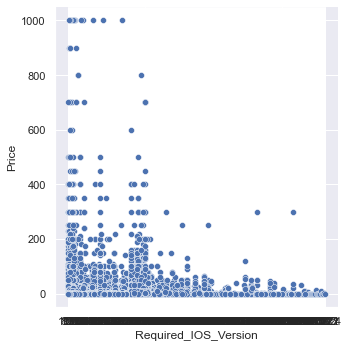

In [6]:
sn.relplot(data=df, x="Required_IOS_Version", y="Price")

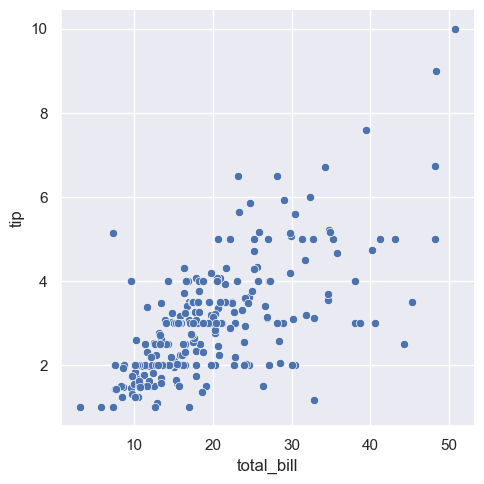

In [7]:
tips = sn.load_dataset("tips")
sn.relplot(data=tips, x="total_bill", y="tip")

> No comando acima gera gráficos a partir do seaborn, passando as colunas a serem comparadas

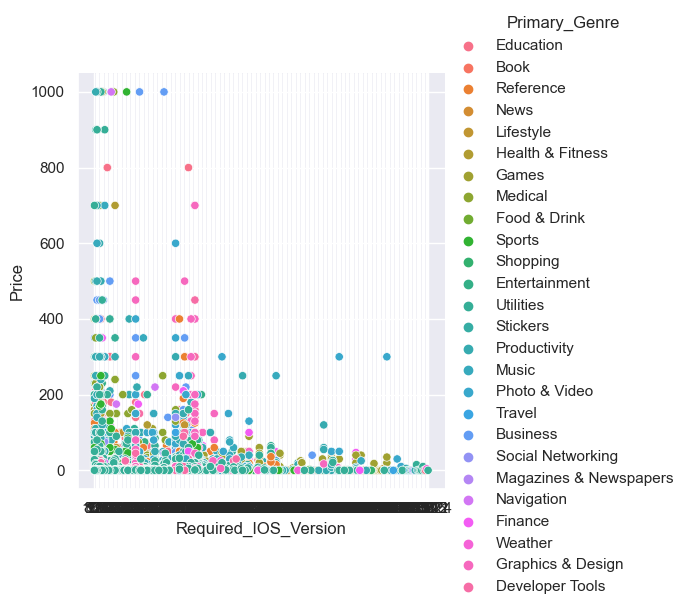

In [8]:
sn.relplot(data=df, x="Required_IOS_Version", y="Price", hue="Primary_Genre")

> No comando acima, foi possível constatar por meio do gráfico, os diferentes apps com suas versões de IOS \
> Com o respectivo preço, ainda tendo um agrupamento por categorias por cores

In [13]:
df['update-date'] = df['Updated'].dt.normalize()
df['update-date'].head()

AttributeError: Can only use .dt accessor with datetimelike values

> No comando acima, seria possível extrair somenta a data do data-hora, porém o nosso arquivo não corresponde ao tipo esperado

In [15]:
loginGen = df.groupby(by='Primary_Genre').size()
loginGen.head()

Primary_Genre
Book                11472
Business           128297
Developer Tools      1951
Education          119174
Entertainment       53147
dtype: int64

> No comando acima, realiza um group by por determinado campo, geralmente por categorias especificas \
> E realizar uma visão por 1 ou mais colunas

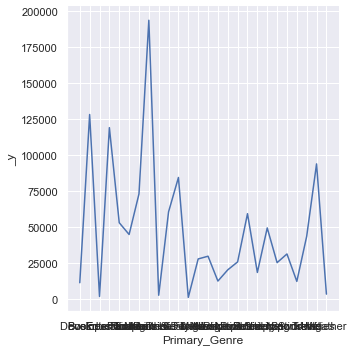

In [18]:
sn.relplot(data=loginGen, kind="line")

> Após agrupado por gênero, fora capturado o grafico da quantidade por gênero